In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
#Using Pytorch to download Fashion MNIST 
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True , download = True , transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train = False , download = True , transform = transforms.ToTensor ())

#Training and test loaders will be a list that help us visualise the dataset. 
train_loader = torch.utils.data.DataLoader(train_set , batch_size = 32, shuffle = True) 
test_loader = torch.utils.data.DataLoader(test_set , batch_size = 32, shuffle = False)

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        
        self.conv_layer_1 = nn.Sequential(nn.Conv2d(1, 32, 5), nn.ReLU(), nn.MaxPool2d(2, 2))
        
        self.conv_layer_2 = nn.Sequential(nn.Conv2d(32, 64, 5), nn.ReLU(), nn.MaxPool2d(2, 2))
        
        self.fc_layer_1 = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU())
        
        self.fc_layer_2 = nn.Sequential(nn.Linear(1024, 256), nn.ReLU())
    
    def forward(self, x):
        x = self.conv_layer_1(x)
        
        x = self.conv_layer_2(x)
        
        x = x.reshape(x.size(0), -1)
        
        x = self.fc_layer_1(x)
        
        x = self.fc_layer_2(x)
        
        return x
        
        
        

In [4]:
def weights_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)

In [5]:
def evaluation(dataloader):
  
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data in dataloader:
            
            inputs, labels = data
            
            outputs = model(inputs)

            _, prediction = torch.max(outputs.data, 1)
            total += labels.size(0)
  
            correct += (prediction == labels).sum().item()
    return (correct / total) * 100

In [6]:
model = Classifier()

model.apply(weights_init)

loss_function = nn.CrossEntropyLoss()

optimiser = torch.optim.SGD(model.parameters(), lr = 0.1)



In [7]:
loss_epoch_array = []
max_epochs = 30
loss_epoch = 0
train_accuracy = []
test_accuracy = []


for epoch in range(max_epochs):
  
    loss_epoch = 0
  
    for i, data in enumerate(train_loader, 0):
    
        model.train()
        
        inputs, labels = data
        
        optimiser.zero_grad()
        
        outputs = model(inputs)
        
        loss = loss_function(outputs, labels)
        
        loss.backward()
        
        optimiser.step()
        
        loss_epoch += loss.item()
  
    loss_epoch_array.append(loss_epoch)
    train_accuracy.append(evaluation(train_loader))
    test_accuracy.append(evaluation(test_loader))
    print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

Epoch 1: loss: 3274.7490272521973, train accuracy: 68.95166666666667, valid accuracy:67.96
Epoch 2: loss: 2663.541819125414, train accuracy: 70.50333333333333, valid accuracy:69.51
Epoch 3: loss: 2582.295767247677, train accuracy: 71.47, valid accuracy:69.78
Epoch 4: loss: 1543.488279439509, train accuracy: 82.72500000000001, valid accuracy:80.73
Epoch 5: loss: 1192.4344421066344, train accuracy: 92.67166666666667, valid accuracy:90.42999999999999
Epoch 6: loss: 393.87602633144706, train accuracy: 93.19166666666666, valid accuracy:90.10000000000001
Epoch 7: loss: 353.86257710214704, train accuracy: 93.63666666666667, valid accuracy:90.13
Epoch 8: loss: 316.5154960947111, train accuracy: 95.0, valid accuracy:90.41
Epoch 9: loss: 283.9769812459126, train accuracy: 95.76666666666667, valid accuracy:91.19
Epoch 10: loss: 249.4168915040791, train accuracy: 95.705, valid accuracy:90.84
Epoch 11: loss: 220.67170673189685, train accuracy: 96.72666666666667, valid accuracy:91.2
Epoch 12: loss: 

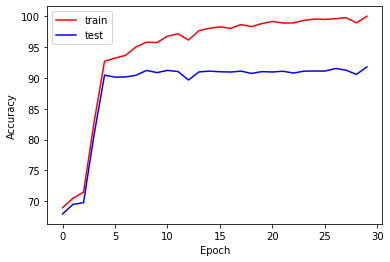

In [8]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(train_accuracy, "r")
plt.plot(test_accuracy, "b")
plt.gca().legend(('train','test'))

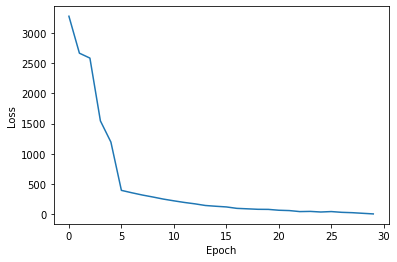

In [9]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_epoch_array)

In [10]:
pip list > my_env.txt


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
